## Best Practices
Now that you have the technical skills to make great visualizations, it’s important that you make them as meaningful as possible. In this chapter, you’ll review three plot types that are commonly discouraged in the data viz community: heat maps, pie charts, and dynamite plots. You’ll learn the pitfalls with these plots and how to avoid making these mistakes yourself.

### Bar plots: dynamite plots
In the video we saw many reasons why "dynamite plots" (bar plots with error bars) are not well suited for their intended purpose of depicting distributions. If you really want error bars on bar plots, you can of course get them, but you'll need to set the positions manually. A point geom will typically serve you much better.

Nonetheless, you should know how to handle these kinds of plots, so let's give it a try.

Warning message:
"`fun.y` is deprecated. Use `fun` instead."

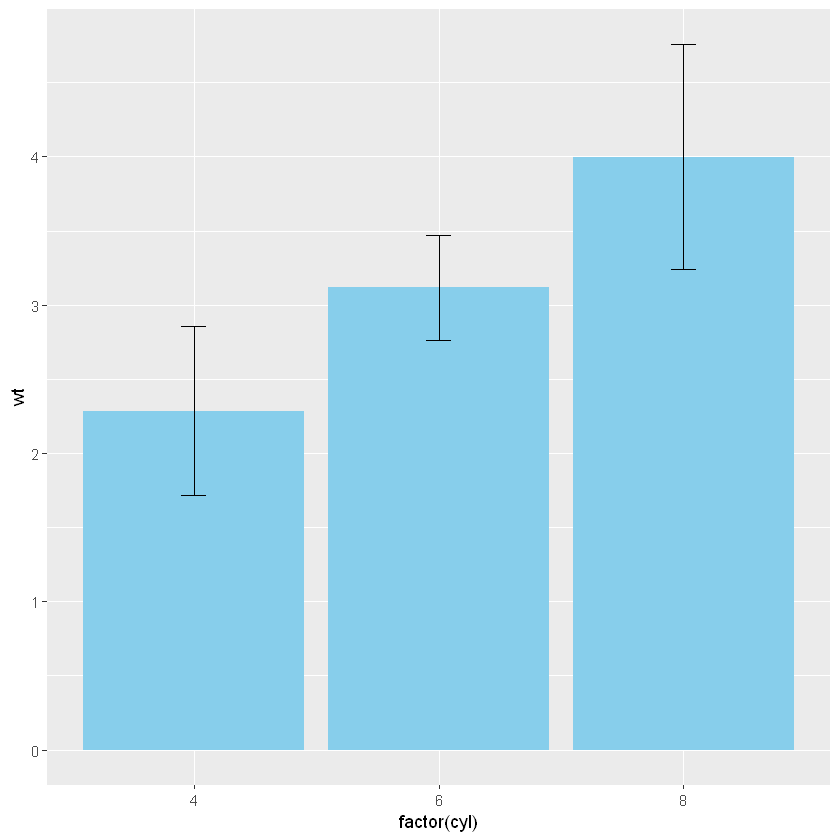

In [2]:
library(ggplot2)

# Plot wt vs. fcyl
ggplot(mtcars, aes(x = factor(cyl), y = wt)) +
  # Add a bar summary stat of means, colored skyblue
  stat_summary(fun.y = mean, geom = "bar", fill = "skyblue") +
  # Add an errorbar summary stat std deviation limits
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", width = 0.1)

### Bar plots: position dodging
In the previous exercise we used the mtcars dataset to draw a dynamite plot about the weight of the cars per cylinder type.

In this exercise we will add a distinction between transmission type, fam, for the dynamite plots and explore position dodging (where bars are side-by-side).

Warning message:
"`fun.y` is deprecated. Use `fun` instead."

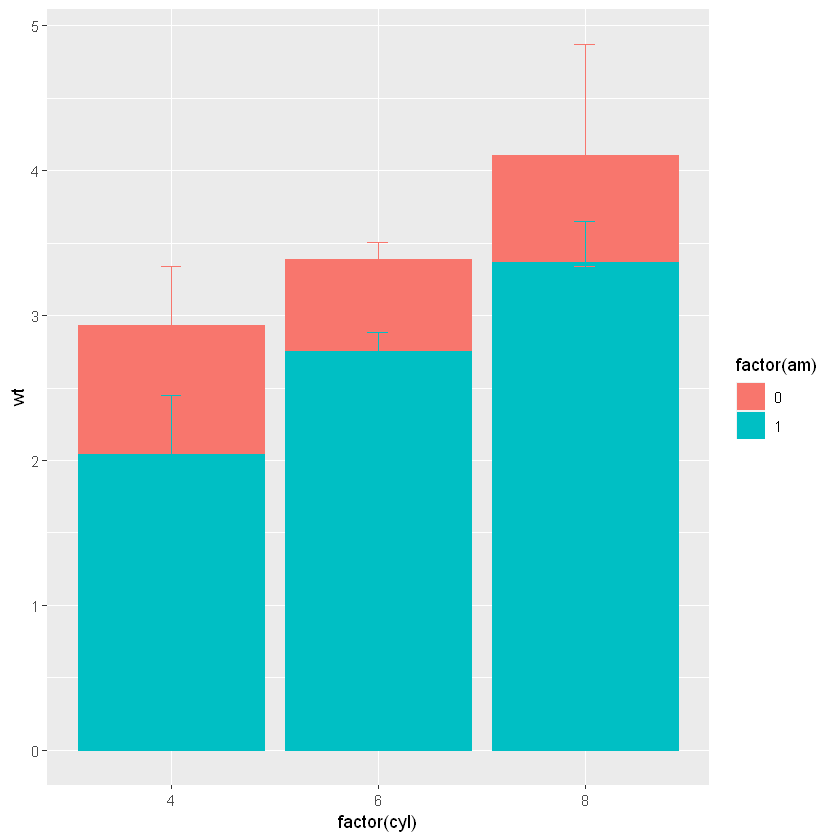

In [4]:
# Update the aesthetics to color and fill by fam
ggplot(mtcars, aes(x = factor(cyl), y = wt, color = factor(am), fill = factor(am))) +
  stat_summary(fun.y = mean, geom = "bar") +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", width = 0.1)

Warning message:
"`fun.y` is deprecated. Use `fun` instead."

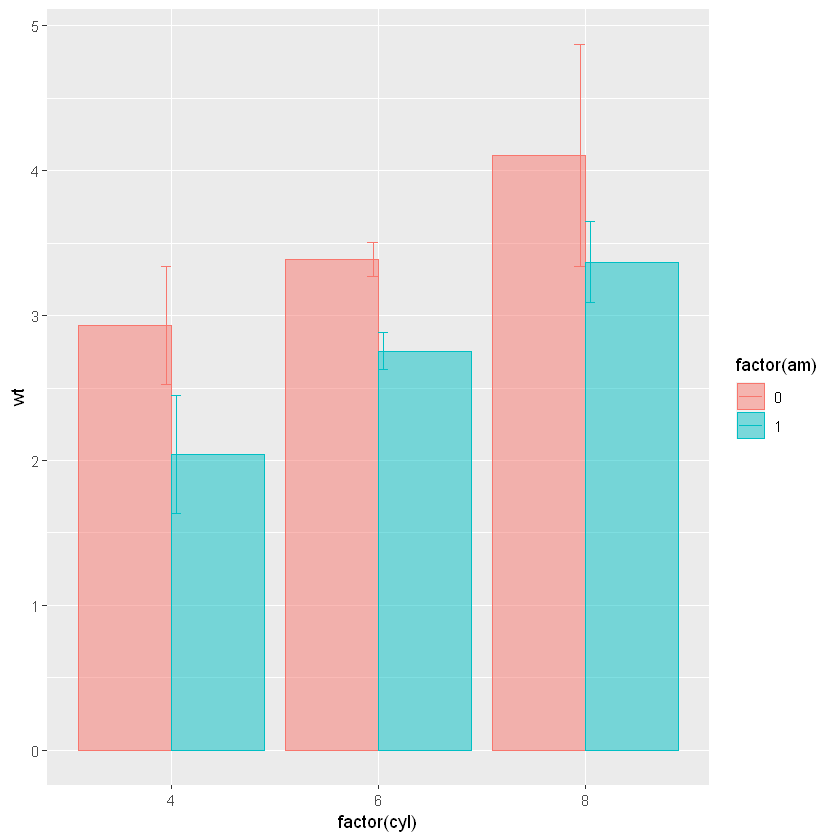

In [6]:
# The stacked bars are tricky to interpret. Make them transparent and side-by-side.
  
# Set alpha for the first and set position for each stat summary function
ggplot(mtcars, aes(x = factor(cyl), y = wt, color = factor(am), fill = factor(am))) +
  stat_summary(fun.y = mean, geom = "bar", position = "dodge", alpha = 0.5) +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), geom = "errorbar", position = "dodge", width = 0.1)

Warning message:
"`fun.y` is deprecated. Use `fun` instead."

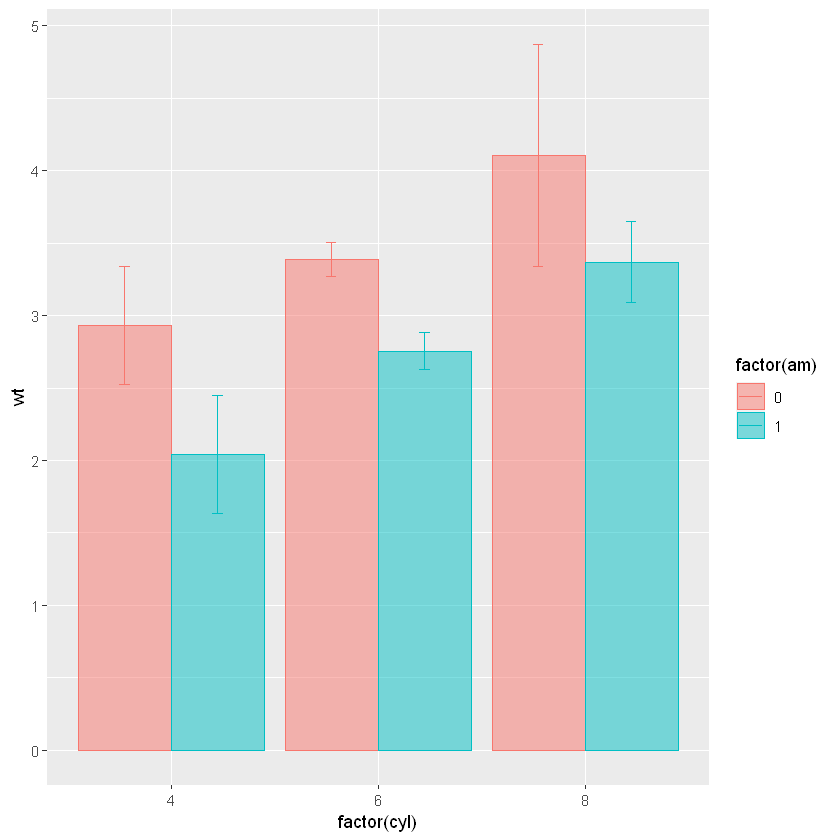

In [8]:
# Define a dodge position object with width 0.9
posn_d <- position_dodge(width = 0.9)

# For each summary stat, update the position to posn_d
ggplot(mtcars, aes(x = factor(cyl), y = wt, color = factor(am), fill = factor(am))) +
  stat_summary(fun.y = mean, geom = "bar", position = posn_d, alpha = 0.5) +
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), width = 0.1, position = posn_d, geom = "errorbar")